In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import beta,gamma

from dotenv import load_dotenv,find_dotenv

import os

import missingno as mss

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import pingouin as png

import scipy.stats

from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import MinMaxScaler

import sklearn.naive_bayes

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression

1. Imaginemos que estamos haciendo pruebas de calidad en una fabrica de productos electrónicos. Esta toma un producto al alzar y nos dice si es defectuoso o no. Es decir, 
nos va a indicar la probabilidad de tener un producto defectuoso. Existe una creencia de usted como especialista lo siguiente:
* El 10% son defectuoso de fábrica. 
* Ahora bien usted realiza una muestra aleatoria de 20 productos y encuentra que 3 de estos son defectuosos. Calcular la probabilidad posteriori de la distribución

Media a Priori:  0.10009890684543984
Varianza a Priori:  0.008172644391467088




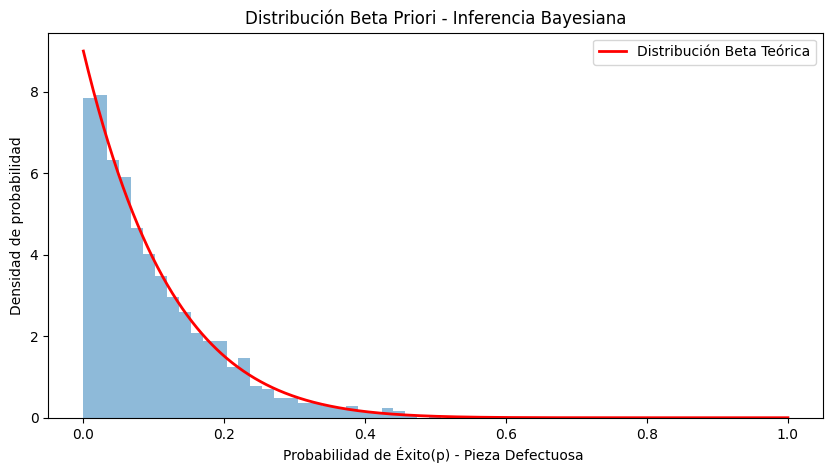

In [55]:
# Analizando el caso, estamos en un problema de proporciones donde tenemos que modelar tasas de exito (piezas defectuosas)
# Por lo tanto utilizamos la distribución Beta tiene dos parámetros, alfa (α) y beta (β), que controlan la forma de la distribución. 
# El parametro α controla el sesgo hacia el éxito (1) y β controla el sesgo hacia el fracaso (0)

# Priori: Mi creencia del suceso: 10% defectuoso  de fábrica
priori_alpha = 1
priori_beta = 9

# Simulamos muestras de segun numero de observaciones
num_obs = 1000
priori_samples = np.random.beta(priori_alpha,priori_beta,size=num_obs)

# Calculamos los estadisticos: Xn (Media) y S^2n (Varianza)
Xn = np.mean(priori_samples)
print('Media a Priori: ',Xn)
Vn = np.var(priori_samples)
print('Varianza a Priori: ',Vn)
print('\n')

# Calculamos la Funcion de Densidad Poblacional para hallar la Verosimilitud relativa de que nuestra variable aleatoria X pueda estar en la región que planteamos a Priori
x=np.linspace(0,1,num_obs)
priori_pdf= beta.pdf(x,priori_alpha,priori_beta)

# Grafica de Distribucion Beta
plt.figure(figsize=(10,5))
plt.hist(priori_samples,bins=30,alpha=0.5,density=True)
plt.plot(x,priori_pdf,'r',lw=2,label='Distribución Beta Teórica')
plt.xlabel('Probabilidad de Éxito(p) - Pieza Defectuosa ')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Beta Priori - Inferencia Bayesiana')
plt.legend()
plt.show()

**Conclusión:** La gráfica tiene una forma exponencial decreciente debido a que se visualiza una creencia a priori muy fuerte que la mayoria de piezas no son defectuosas y el indicador de La Varianza Priori < Media Priori comprueba que esta creencia es bastante precisa sobre la probabilidad de exito

Media a Priori:  0.13481329608639903
Varianza a Priori:  0.0035710521004647428




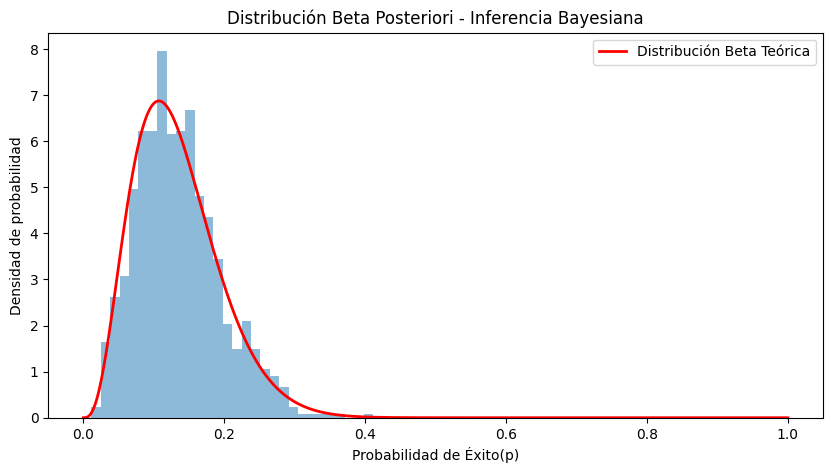

In [3]:

# Posteriori: En mi observación, de una muestra aleatoria de 20 productos, 3 son defectuosos
n = 20 
k = 3 

# La expectativa que tendremos de nuestros datos:
posterior_alpha= priori_alpha + k # antiguo alfa + k
posterior_beta= priori_beta + n -k # antiguo beta - (n-k)

# Simulamos muestras de segun numero de observaciones
num_obs = 1000
posterior_samples = np.random.beta(posterior_alpha,posterior_beta,size=num_obs)

# Calculamos los estadisticos: Xn (Media) y S^2n (Varianza)
Xn = np.mean(posterior_samples)
print('Media a Priori: ',Xn)
Vn = np.var(posterior_samples)
print('Varianza a Priori: ',Vn)
print('\n')

# Calculamos la Funcion de Densidad Poblacional para hallar la Verosimilitud relativa de que nuestra variable aleatoria X pueda estar en la región que planteamos en Posteriori
x=np.linspace(0,1,num_obs)
posterior_pdf=beta.pdf(x,posterior_alpha,posterior_beta)

# Grafica de Distribucion Beta
plt.figure(figsize=(10,5))
plt.hist(posterior_samples,bins=30,alpha=0.5,density=True)
plt.plot(x,posterior_pdf,'r',lw=2,label='Distribución Beta Teórica')
plt.xlabel('Probabilidad de Éxito(p)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Beta Posteriori - Inferencia Bayesiana')
plt.legend()
plt.show()

**Conclusión:** La gráfica tiene una forma de beta al ajustarse con la observación y el indicador de La Varianza Priori < Media Priori comprueba que la posteriori sigue la creencia inicial con la información actualizada de observación

Intervalo de Credibilidad de 95%: (0.0391,0.2730)




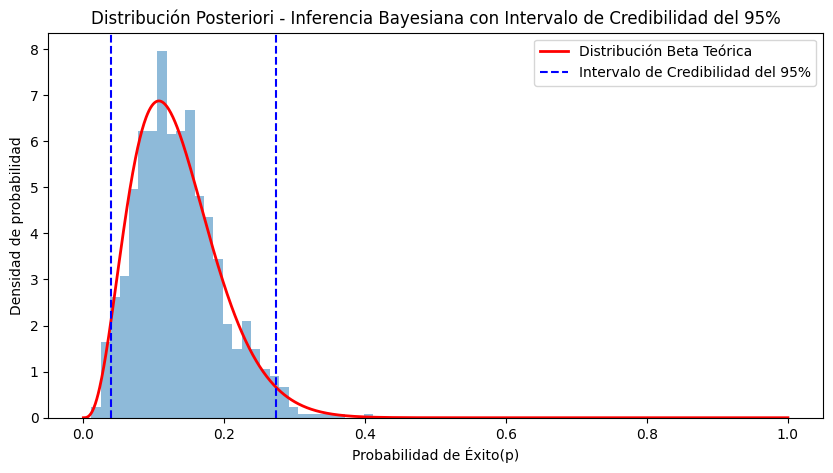

In [4]:
# Intervalos de Credibilidad: Intervalos de Confianza Bayesiana

percentil_inferior = 2.5
percentil_superior = 97.5

lower_percentil=np.percentile(posterior_samples, percentil_inferior)
upper_percentil=np.percentile(posterior_samples, percentil_superior)
print(f"Intervalo de Credibilidad de 95%: ({lower_percentil:.4f},{upper_percentil:.4f})")
print('\n')

# Grafica de Distribucion Beta
plt.figure(figsize=(10,5))
plt.hist(posterior_samples,bins=30,alpha=0.5,density=True)
plt.plot(x,posterior_pdf,'r',lw=2,label='Distribución Beta Teórica')
plt.axvline(lower_percentil, color='b', linestyle='--', label='Intervalo de Credibilidad del 95%')
plt.axvline(upper_percentil, color='b', linestyle='--')
plt.xlabel('Probabilidad de Éxito(p)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Posteriori - Inferencia Bayesiana con Intervalo de Credibilidad del 95%')
plt.legend()
plt.show()

**Conclusión:** Según nuestro intervalo de confianza, la probabilidad de que una pieza sea defectuosa se encuentra en un rango del 3% al 26% en un 95% de los casos

2. Supongamos que esta interesado en modelar la tasa de clientes que llega durante una hora. Usted ha conversado con el vigilante y este tiene la creencia que llegan 5 clientes en una hora. Ahora usted manda a su practicante de ing. Industrial a controlar los tiempos y este al volver le dice que en una hora han llegado 8 personas. Para esto usted ha decidido utilizar una distribución gamma con Alpha=5 y beta=1 para la prior, mientras que para el experimento del practicante usted eligió una distribución gamma. Calcule la probabilidad posteriori.

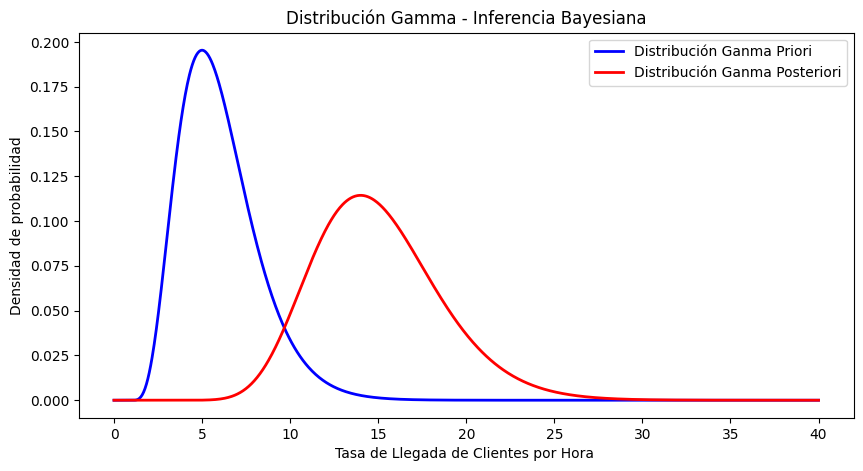

In [5]:
# Analizando el caso, estamos en un problema de proporciones donde tenemos el tiempo en que ocurra un evento
# Por lo tanto utilizamos la distribución Gamma tiene dos parámetros, alfa (α) y beta (β), que controlan la forma de la distribución. 
# El parametro α controla la indica la forma de la distribucion en funcion al evento y β controla la escala de la distribución en función al tiempo


# Priori: Mi creencia del suceso: Tasa de 5 clientes por 1 hora
priori_alpha = 5
priori_beta = 1

# Simulamos muestras de segun numero de observaciones
num_obs = 1000

# Calculamos la Funcion de Densidad Poblacional para hallar la Verosimilitud relativa de que nuestra variable aleatoria X pueda estar en la región que planteamos a Priori
total_muestra = 40 # clientes
x=np.linspace(0,total_muestra,num_obs)
priori_pdf= gamma.pdf(x,priori_alpha,1/priori_beta)

# Posteriori: En mi observación, el practicante registró una tasa de 8 clientes por Hora
k = 8
t = 1 

# La expectativa que tendremos de nuestros datos:
posterior_alpha= priori_alpha + k # antiguo alfa + nuevos clientes registrados
posterior_beta= priori_beta + t # antigo beta + tiempo nuevo registrado (1 hora)

# Simulamos muestras de segun numero de observaciones
num_obs = 1000

# Calculamos la Funcion de Densidad Poblacional para hallar la Verosimilitud relativa de que nuestra variable aleatoria X pueda estar en la región que planteamos en Posteriori
posterior_pdf=gamma.pdf(x,posterior_alpha,posterior_beta)

# Grafica de Distribucion Gamma
plt.figure(figsize=(10,5))
plt.plot(x,priori_pdf,'b',lw=2,label='Distribución Ganma Priori')
plt.plot(x,posterior_pdf,'r',lw=2,label='Distribución Ganma Posteriori')
plt.xlabel('Tasa de Llegada de Clientes por Hora ')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Gamma - Inferencia Bayesiana')
plt.legend()
plt.show()

**Conclusión:** Luego de la observación, se observa unae mayor concentración en el valor central y un desplazamiento a la derecha en comparación con la distribucion a priori (Juicio de Experto del Vigilante) lo que nos indica que se ha ajustado con mayor precisión

Intervalo de Confianza del 95.0%: (3.4610, 10.4808)


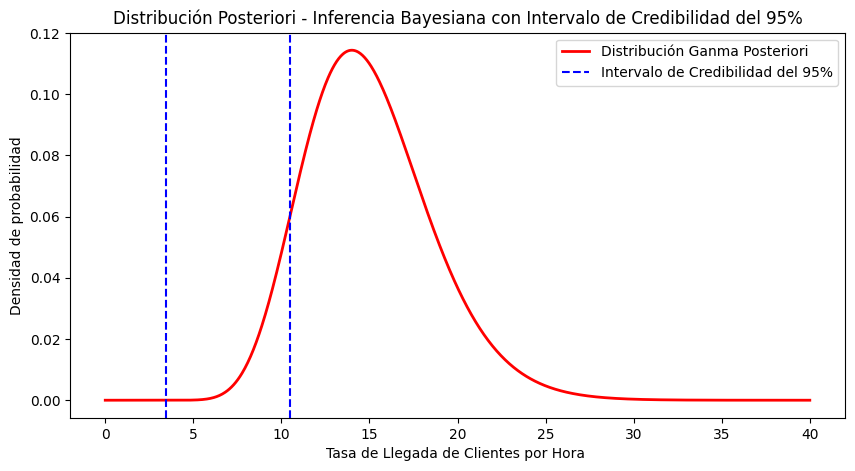

In [6]:
# Intervalos de Credibilidad: Intervalos de Confianza Bayesiana

confianza = 0.95

# Valor crítico para el nivel de confianza
valor_critico = gamma.ppf([((1 - confianza) / 2), (1 + confianza) / 2], a=posterior_alpha, scale=1/posterior_beta)
intervalo_confianza = (valor_critico[0], valor_critico[1])
print(f"Intervalo de Confianza del {confianza * 100}%: ({intervalo_confianza[0]:.4f}, {intervalo_confianza[1]:.4f})")

# Grafica de Distribucion Beta
plt.figure(figsize=(10,5))
plt.plot(x,posterior_pdf,'r',lw=2,label='Distribución Ganma Posteriori')
plt.axvline(intervalo_confianza[0], color='b', linestyle='--', label='Intervalo de Credibilidad del 95%')
plt.axvline(intervalo_confianza[1], color='b', linestyle='--')
plt.xlabel('Tasa de Llegada de Clientes por Hora ')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Posteriori - Inferencia Bayesiana con Intervalo de Credibilidad del 95%')
plt.legend()

**Conclusión:** Según nuestro intervalo de confianza, con un nivel del 95% es probable que en promedio lleguen entre 3 a 10 clientes por Hora

3. Se está adjuntando una base de datos de infidelidad tomada en cuenta por Fair(1978) “A theory of extramarital affair”. Usted debe calcular un modelo de clasificación para bayes (Naive Bayes) 

In [3]:
load_dotenv(find_dotenv('.env'))
df = pd.read_csv(os.getenv('PATH_DATA'),delimiter=';')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,1,0,male,37.0,10.00,no,3,18,7,4
1,2,0,female,27.0,4.00,no,4,14,6,4
2,3,0,female,32.0,15.00,yes,1,12,1,4
3,4,0,male,57.0,15.00,yes,5,18,6,5
4,5,0,male,22.0,0.75,no,2,17,6,3


In [4]:
columns_dict = {'X1': 'EXTRAMARITAL_AFFAIR',
           'X2': 'SEX',
           'X3': 'AGE',
           'X4': 'TERM_NOT_MARRIED',
           'X5': 'CHILDREN',
           'X6':'LEVEL_EDUCATION',
           'X7':'OCUPATION',
           'X8': 'RATE_MARRIAGE',
           'X9': 'TIME_SPENT_EXTRAMARITAL'}
df = df.drop('Unnamed: 0',axis=1)
df.rename(columns=columns_dict,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EXTRAMARITAL_AFFAIR      601 non-null    int64  
 1   SEX                      601 non-null    object 
 2   AGE                      601 non-null    float64
 3   TERM_NOT_MARRIED         601 non-null    float64
 4   CHILDREN                 601 non-null    object 
 5   LEVEL_EDUCATION          601 non-null    int64  
 6   OCUPATION                601 non-null    int64  
 7   RATE_MARRIAGE            601 non-null    int64  
 8   TIME_SPENT_EXTRAMARITAL  601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


<Axes: >

<Figure size 500x500 with 0 Axes>

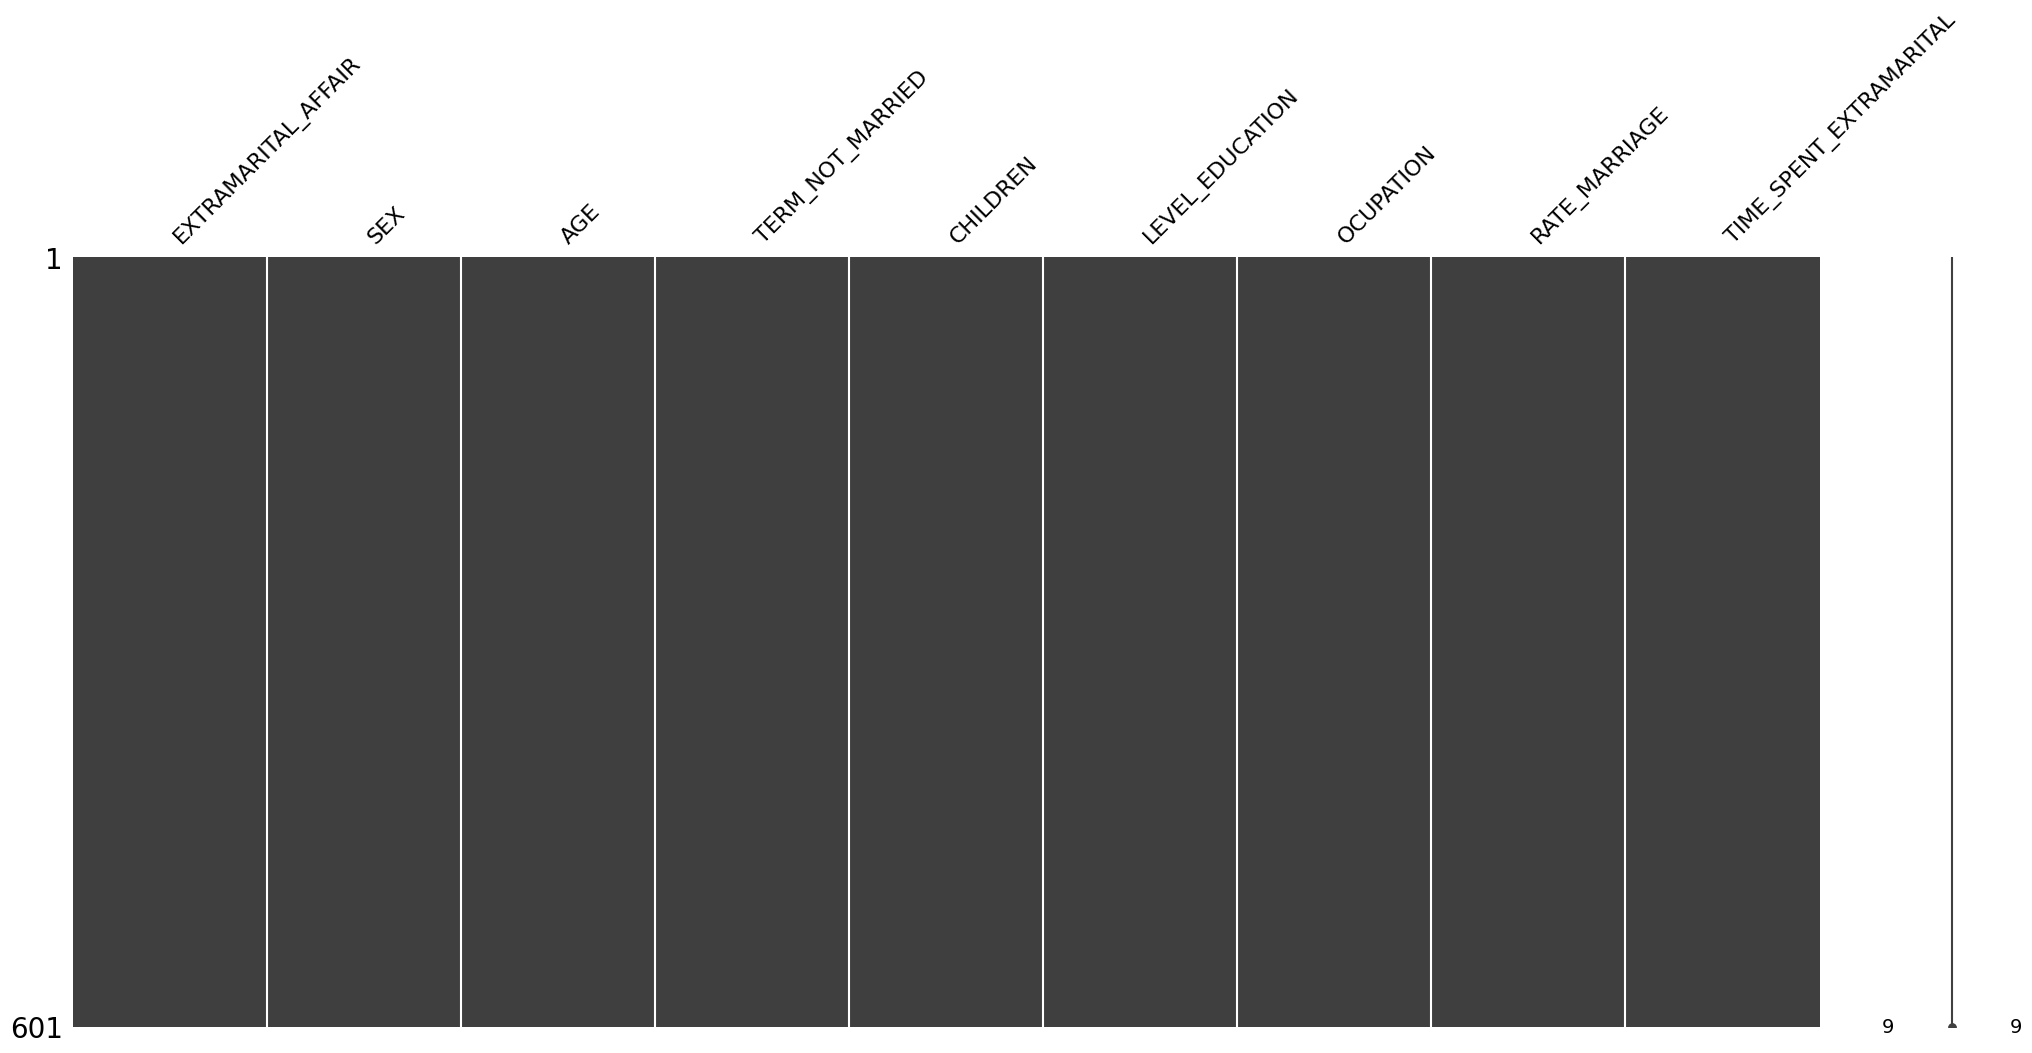

In [5]:
plt.figure(figsize=(5,5))
mss.matrix(df)

Text(0.5, 1.0, 'HISTOGRAMA DE RELACIONES EXTRAMATRIMONIALES')

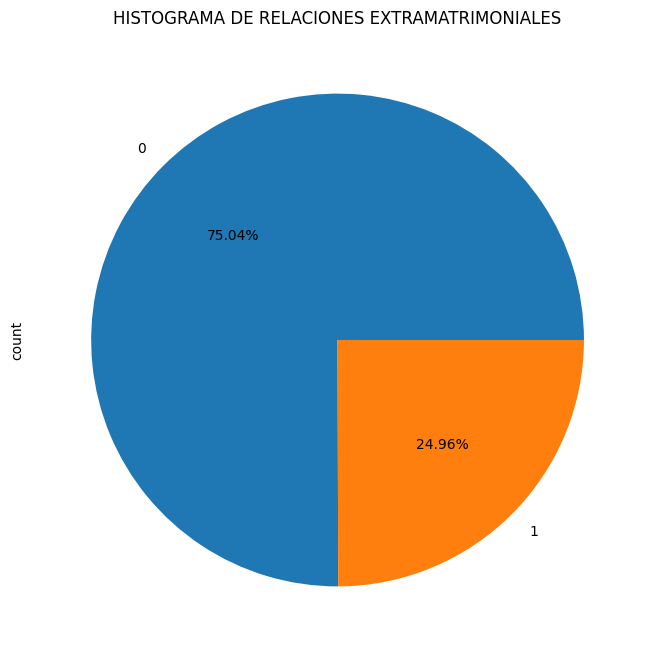

In [6]:
conditions = df['EXTRAMARITAL_AFFAIR']>0
df['EXTRAMARITAL_AFFAIR'] = np.where(conditions,1,0)

plt.figure(figsize=(8,8))
df['EXTRAMARITAL_AFFAIR'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('HISTOGRAMA DE RELACIONES EXTRAMATRIMONIALES')

Observamos que tenemos desbalanceo de nuestros datos. Posteriormente vamos a conocer una forma de tratamiento en estos casos

In [7]:

# Codificar Género con OneHotEncoder
encoder_oh = OneHotEncoder(sparse=False).set_output(transform='pandas')
enc_df = pd.DataFrame(encoder_oh.fit_transform(df[['SEX']]))
df = df.drop('SEX',axis=1)
df = df.join(enc_df)
df.head()

# Codificar Children con OneHotEncoder
encoder_oh = OneHotEncoder(sparse=False).set_output(transform='pandas')
enc_df = pd.DataFrame(encoder_oh.fit_transform(df[['CHILDREN']]))
df = df.drop('CHILDREN',axis=1)
df = df.join(enc_df)
df.head()



,EXTRAMARITAL_AFFAIR,AGE,TERM_NOT_MARRIED,LEVEL_EDUCATION,OCUPATION,RATE_MARRIAGE,TIME_SPENT_EXTRAMARITAL,SEX_female,SEX_male,CHILDREN_no,CHILDREN_yes
0,0,37.0,10.00,3,18,7,4,0.0,1.0,1.0,0.0
1,0,27.0,4.00,4,14,6,4,1.0,0.0,1.0,0.0
2,0,32.0,15.00,1,12,1,4,1.0,0.0,0.0,1.0
3,0,57.0,15.00,5,18,6,5,0.0,1.0,0.0,1.0
4,0,22.0,0.75,2,17,6,3,0.0,1.0,1.0,0.0


In [20]:
df.drop['EXTRAMARITAL_AFFAIR'].columns

Index(['EXTRAMARITAL_AFFAIR', 'AGE', 'TERM_NOT_MARRIED', 'LEVEL_EDUCATION',
       'OCUPATION', 'RATE_MARRIAGE', 'TIME_SPENT_EXTRAMARITAL', 'SEX_female',
       'SEX_male', 'CHILDREN_no', 'CHILDREN_yes'],
      dtype='object')

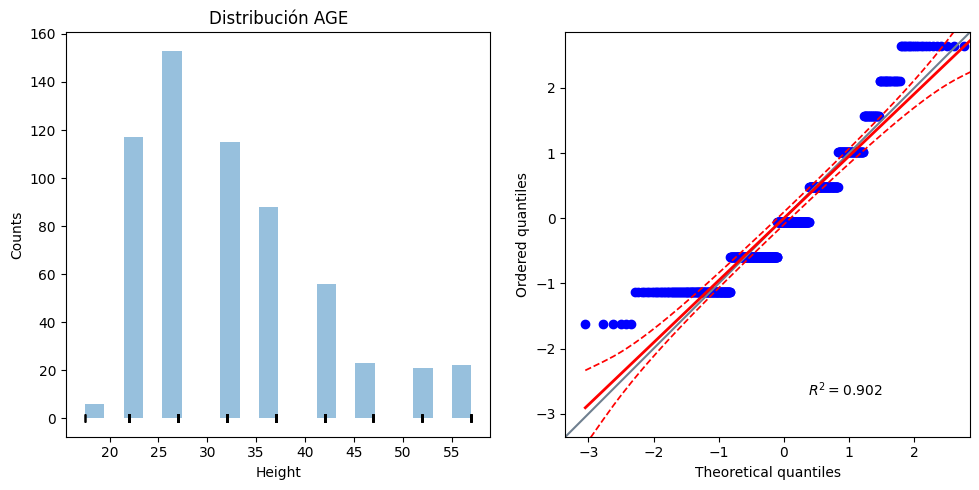

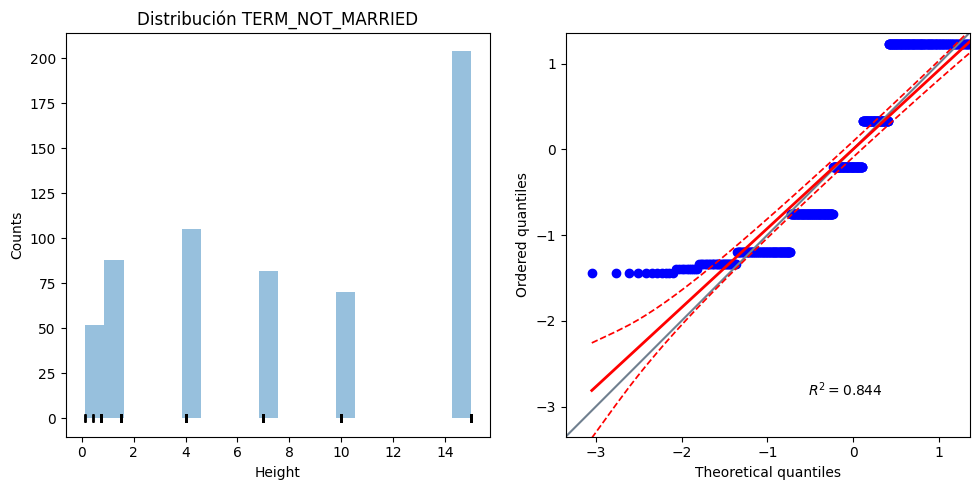

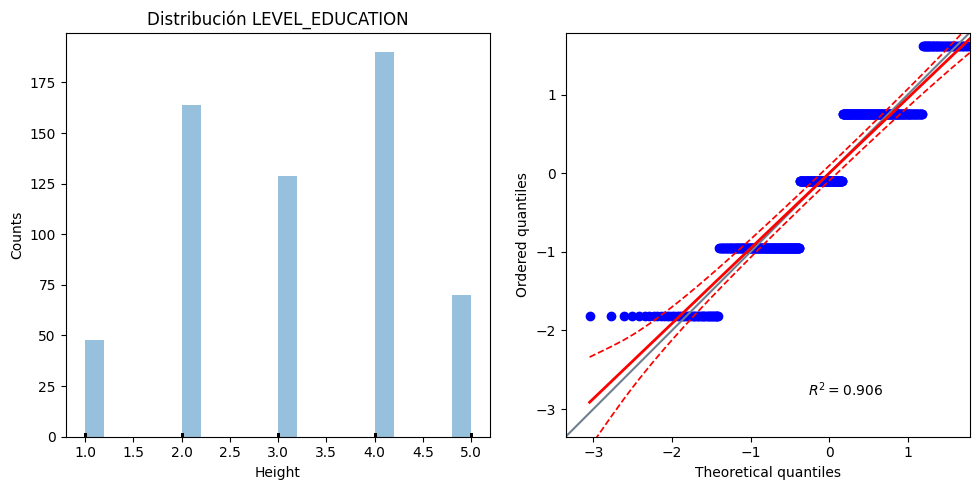

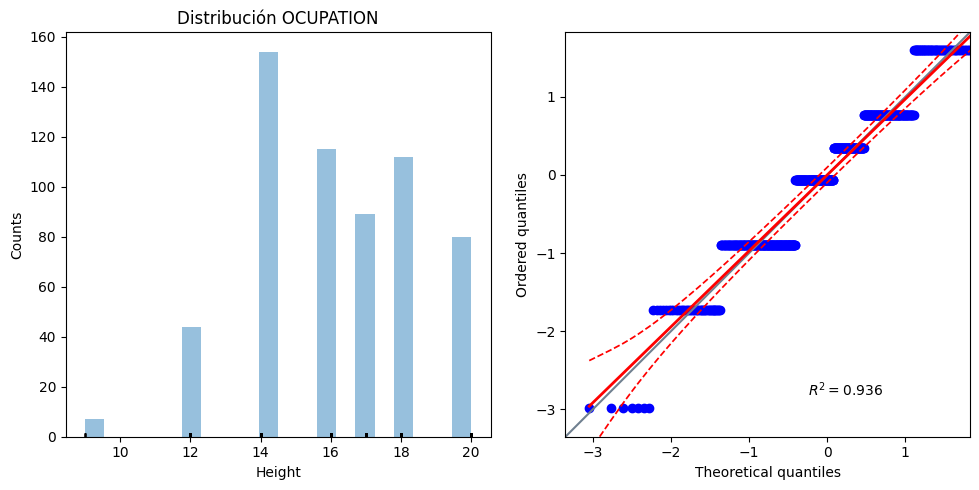

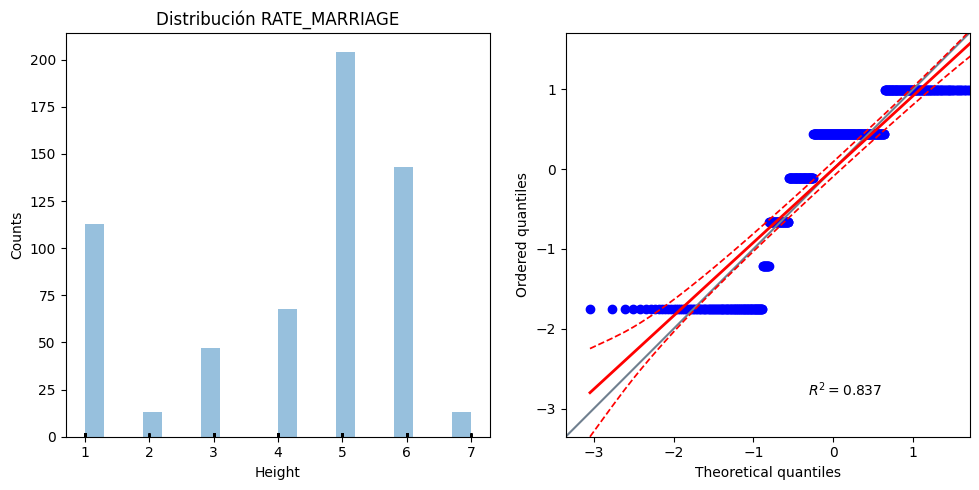

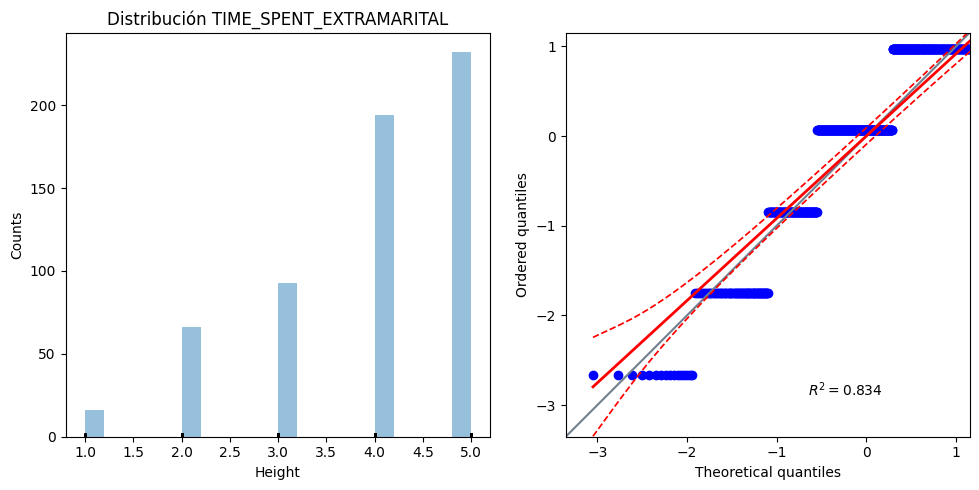

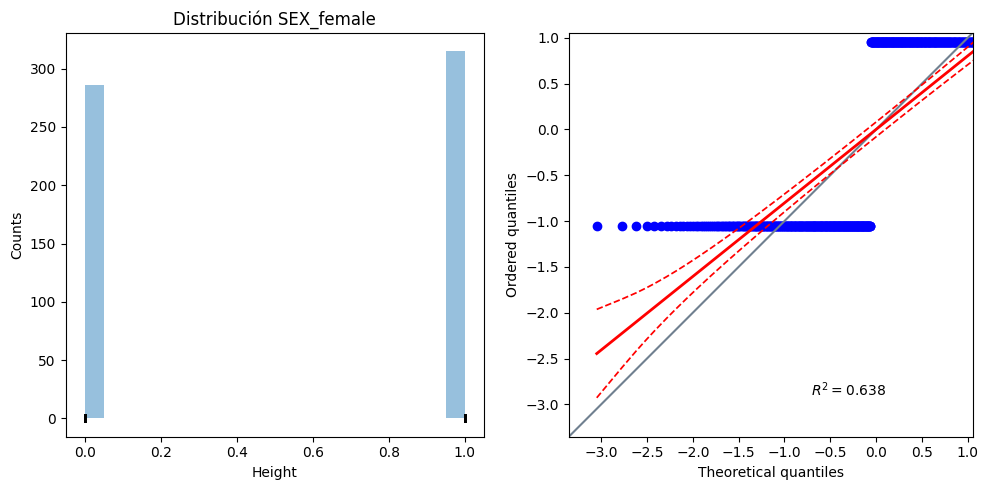

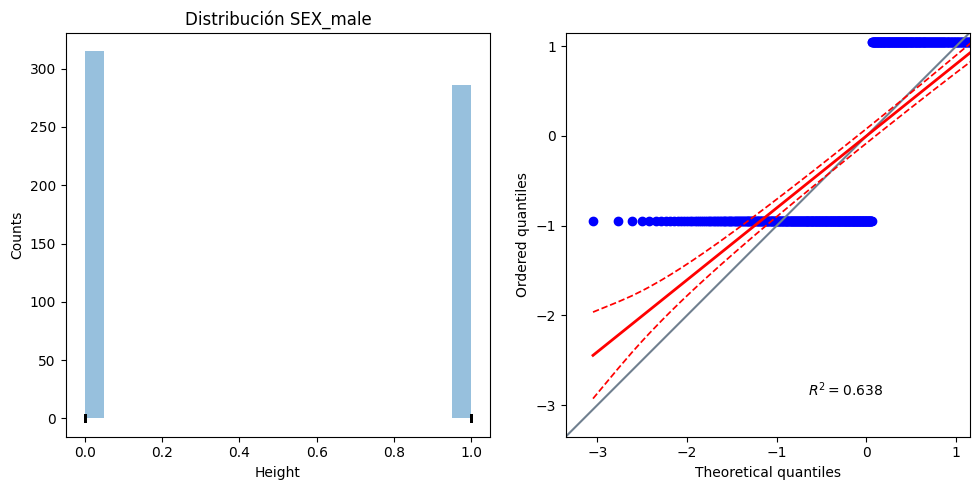

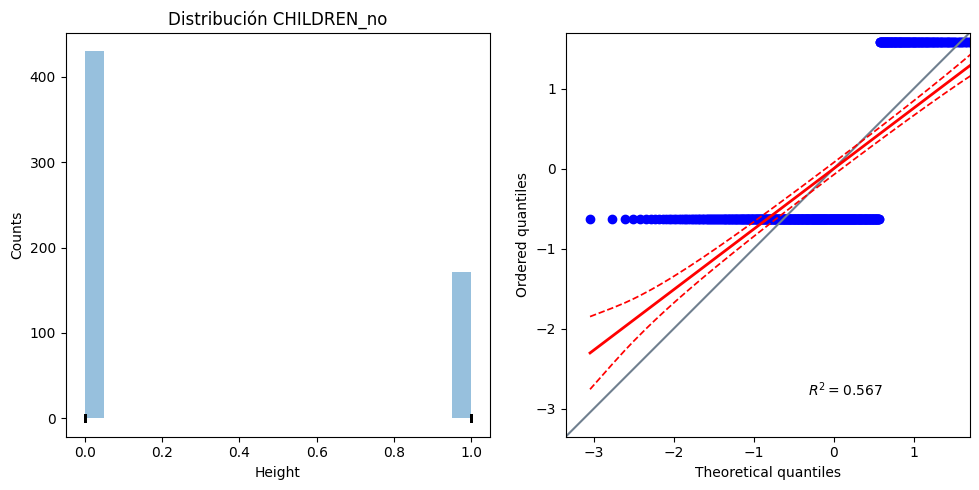

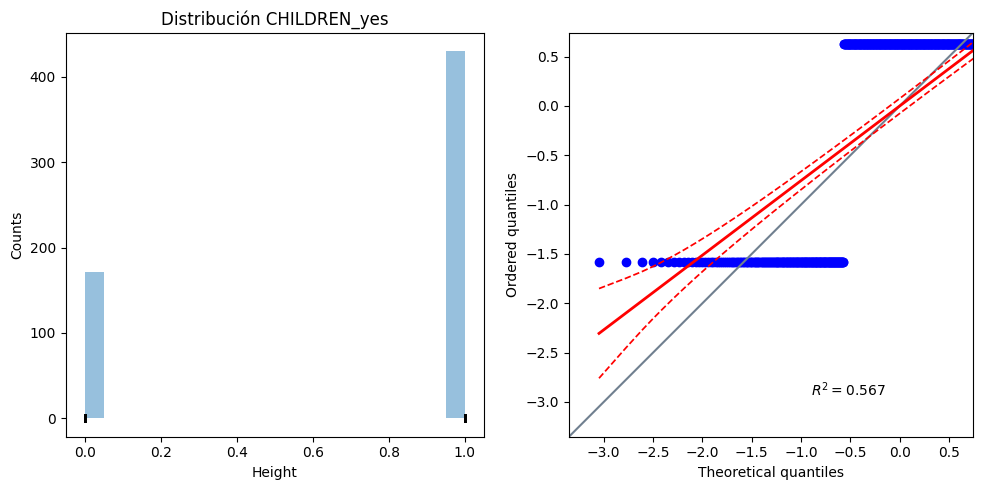

In [21]:
for column in df.drop('EXTRAMARITAL_AFFAIR',axis=1).columns:
    fig,axis= plt.subplots(nrows=1,ncols=2, figsize=(10,5))

    axis[0].hist(x=df[column],bins=20,color='#3182bd', alpha=0.5)
    axis[0].plot(df[column], np.full_like(df[column],-0.01), '|k' ,markeredgewidth=1)
    axis[0].set_title(f'Distribución {column}')
    axis[0].set_xlabel('Height')
    axis[0].set_ylabel('Counts')

    png.qqplot(df[column], dist='norm', ax=axis[1])
    plt.tight_layout()
    

Al aplicar el supuesto de normalidad, podemos observar que nuestros datos siguen una distribución binomial. Por lo tanto se rechaza la H0 ya que no existen pruebas suficientes para afirmar la normalidad en nuestros datos

In [23]:
# Aplicar Test Chi-Cuadrado para muestras binomiales
results = []
for column in df.drop('EXTRAMARITAL_AFFAIR',axis=1).columns:
    contingency_table = pd.crosstab(df[column], df['EXTRAMARITAL_AFFAIR'])
    chi2, p, _, _ = scipy.stats.chi2_contingency(contingency_table)
    results.append({'Columna de Entrada': column, 'p-Value': p})


summary_df = pd.DataFrame(results)
summary_df = summary_df.sort_values(by='p-Value')
summary_df

,Columna de Entrada,p-Value
5,TIME_SPENT_EXTRAMARITAL,2.185891e-08
2,LEVEL_EDUCATION,6.694164e-04
8,CHILDREN_no,1.519584e-03
9,CHILDREN_yes,1.519584e-03
1,TERM_NOT_MARRIED,1.628680e-02
0,AGE,2.300755e-02
6,SEX_female,2.481604e-01
7,SEX_male,2.481604e-01
3,OCUPATION,3.155851e-01
4,RATE_MARRIAGE,3.476851e-01


Observamos que nuestros p-values son menores que el nivel de significancia de 0.05. Por lo tanto se acepta la H0 que indica que nuestros campos son significativos con nuestro outpt EXTRAMARITAL_AFFAIR

In [41]:
X_resampled.iloc[:,0]

298    37.0
39     22.0
335    37.0
398    32.0
153    37.0
       ... 
596    22.0
597    32.0
598    32.0
599    22.0
600    32.0
Name: AGE, Length: 300, dtype: float64

In [44]:
# Como la data está altamente desbalanceada en el caso del 0. Podemos aplicar RandomUnderSampler
X = df.drop('EXTRAMARITAL_AFFAIR',axis=1)
y = df['EXTRAMARITAL_AFFAIR']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 298 to 600
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      300 non-null    float64
 1   TERM_NOT_MARRIED         300 non-null    float64
 2   LEVEL_EDUCATION          300 non-null    int64  
 3   OCUPATION                300 non-null    int64  
 4   RATE_MARRIAGE            300 non-null    int64  
 5   TIME_SPENT_EXTRAMARITAL  300 non-null    int64  
 6   SEX_female               300 non-null    float64
 7   SEX_male                 300 non-null    float64
 8   CHILDREN_no              300 non-null    float64
 9   CHILDREN_yes             300 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 25.8 KB


Text(0.5, 1.0, 'HISTOGRAMA DE RELACIONES EXTRAMATRIMONIALES LUEGO DE APLICAR RandomUnderSampler')

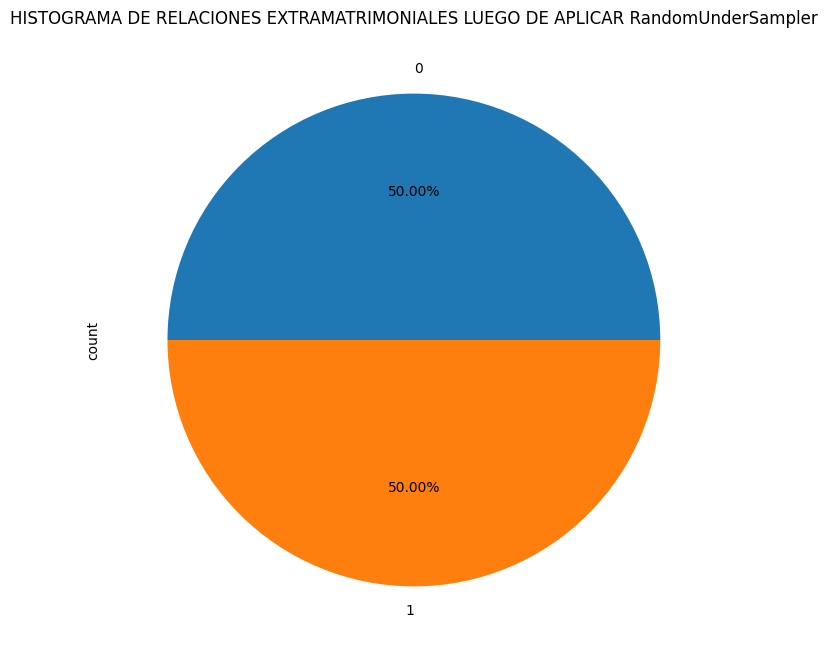

In [45]:
plt.figure(figsize=(8,8))
y_resampled.value_counts().plot.pie(autopct='%1.2f%%')
plt.title('HISTOGRAMA DE RELACIONES EXTRAMATRIMONIALES LUEGO DE APLICAR RandomUnderSampler')

In [48]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled = pd.DataFrame(data=X_scaled, columns=X_resampled.columns)
X_scaled

,AGE,TERM_NOT_MARRIED,LEVEL_EDUCATION,OCUPATION,RATE_MARRIAGE,TIME_SPENT_EXTRAMARITAL,SEX_female,SEX_male,CHILDREN_no,CHILDREN_yes
0,0.493671,1.000000,0.75,0.818182,0.666667,0.50,0.0,1.0,0.0,1.0
1,0.113924,0.042017,0.50,0.636364,0.000000,1.00,1.0,0.0,1.0,0.0
2,0.493671,1.000000,0.75,0.272727,0.500000,0.25,1.0,0.0,0.0,1.0
3,0.367089,1.000000,0.75,0.272727,0.000000,1.00,1.0,0.0,0.0,1.0
4,0.493671,1.000000,0.75,1.000000,0.833333,0.50,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
295,0.113924,0.092437,0.00,0.272727,0.166667,1.00,0.0,1.0,0.0,1.0
296,0.367089,0.663866,0.25,0.818182,0.666667,0.75,1.0,0.0,0.0,1.0
297,0.367089,0.663866,0.25,0.727273,0.833333,1.00,0.0,1.0,0.0,1.0
298,0.113924,0.462185,0.50,0.818182,0.833333,0.25,0.0,1.0,0.0,1.0


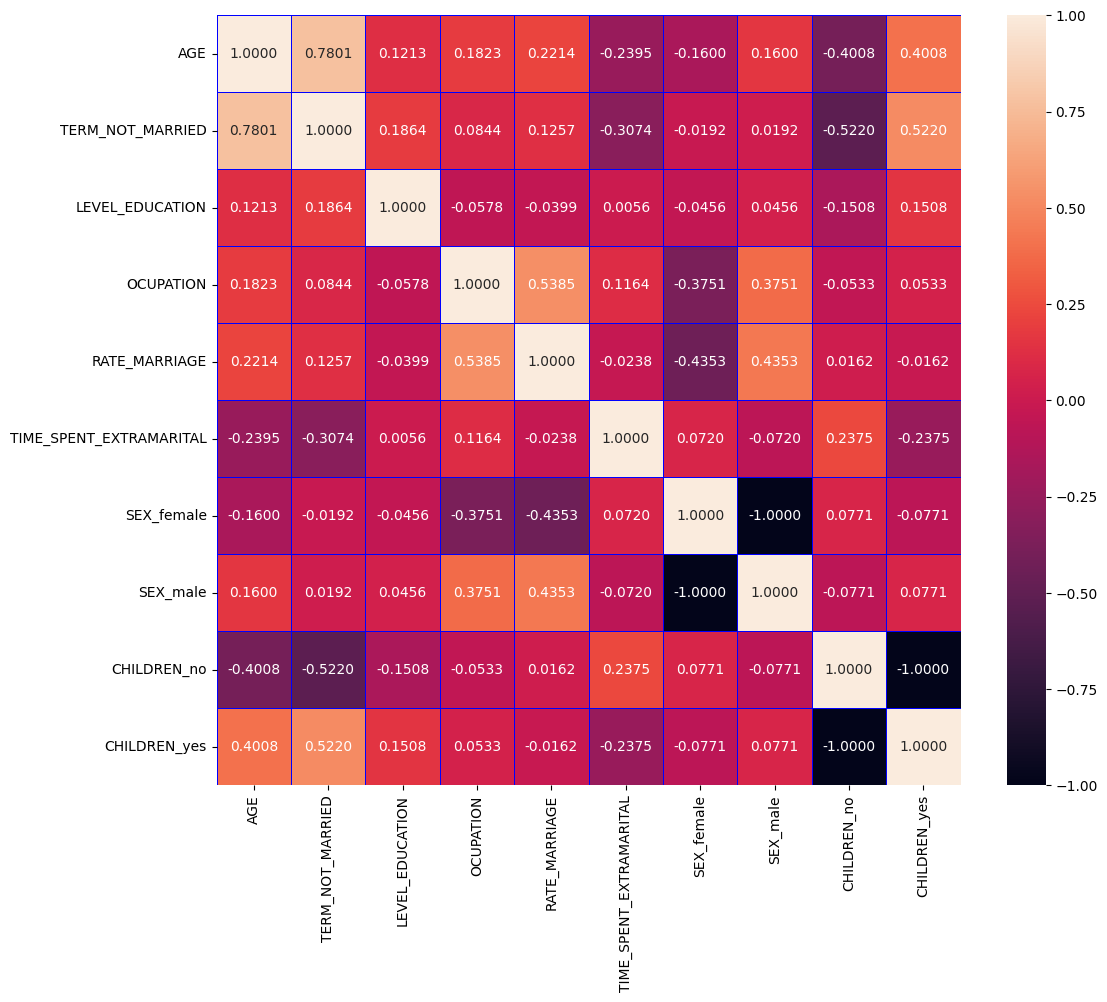

In [50]:
# Matriz de Correlación
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(X_scaled.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

Anteriormente observamos que nuestras variables siguen una distribución binomial y que las variables explicativas son significativas con respecto al OUTPUT 
* Por lo tanto, ante esa relacion significativa no se recomienda utilizar Naive Bayes debido a que este modelo asume la Independencia Condicional entre las variables predictoras
* En nuestra matriz de correlacion observamos un grado fuerte de correlacion entre AGE y TERM_NOR MARRIED

### METRICAS UTILIZANDO NAIVE BAYES

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size = 0.2, random_state=1)

In [78]:
# Debido a la naturaleza de nuestros datos, es conveniente utilizar ComplementNB
bnb = sklearn.naive_bayes.ComplementNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)


print(f'F1 SCORE:  {f1_score(y_test, y_pred)}')

F1 SCORE:  0.6575342465753423


<Axes: >

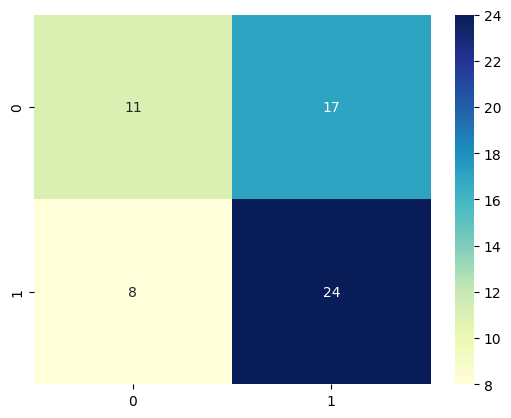

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47        28
           1       0.59      0.75      0.66        32

    accuracy                           0.58        60
   macro avg       0.58      0.57      0.56        60
weighted avg       0.58      0.58      0.57        60



ROC AUC : 0.5714




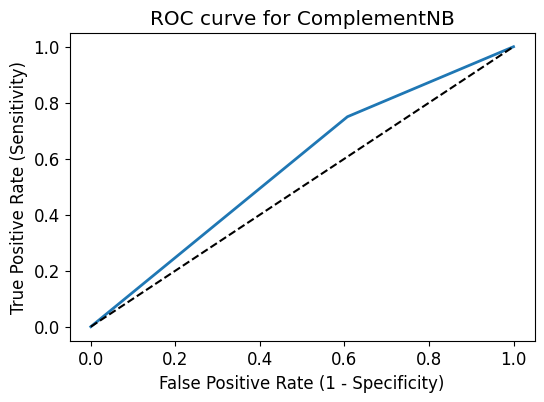

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))
print('\n')

plt.title('ROC curve for ComplementNB')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### METRICAS UTILIZANDO REGRESION LOGISTICA

In [90]:
# Debido a la naturaleza de nuestros datos, es conveniente utilizar ComplementNB
model = LogisticRegression( solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print(f'F1 SCORE:  {f1_score(y_test, y_pred)}')

F1 SCORE:  0.676470588235294


<Axes: >

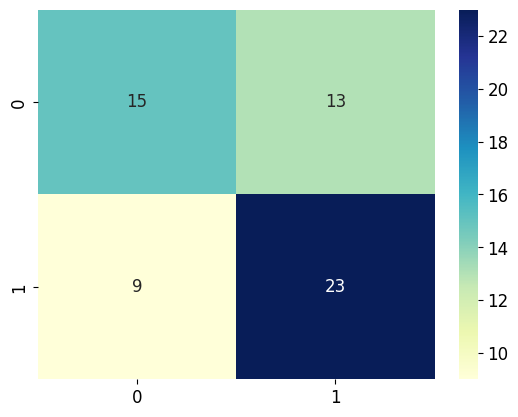

In [91]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.54      0.58        28
           1       0.64      0.72      0.68        32

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.63      0.63      0.63        60



ROC AUC : 0.6272




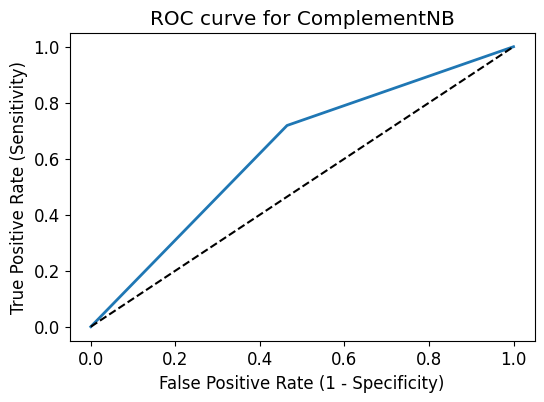

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))
print('\n')

plt.title('ROC curve for ComplementNB')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()